# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Data

In [3]:
df = pd.read_csv('creditcard2.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17408 entries, 0 to 17407
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17408 non-null  int64  
 1   V1      17408 non-null  float64
 2   V2      17408 non-null  float64
 3   V3      17408 non-null  float64
 4   V4      17408 non-null  float64
 5   V5      17408 non-null  float64
 6   V6      17408 non-null  float64
 7   V7      17408 non-null  float64
 8   V8      17408 non-null  float64
 9   V9      17408 non-null  float64
 10  V10     17408 non-null  float64
 11  V11     17408 non-null  float64
 12  V12     17408 non-null  float64
 13  V13     17408 non-null  float64
 14  V14     17408 non-null  float64
 15  V15     17408 non-null  float64
 16  V16     17408 non-null  float64
 17  V17     17408 non-null  float64
 18  V18     17408 non-null  float64
 19  V19     17408 non-null  float64
 20  V20     17408 non-null  float64
 21  V21     17408 non-null  float64
 22

In [5]:
df.Class.value_counts()

Class
'0'    17329
'1'       79
Name: count, dtype: int64

In [6]:
df['Class'] = df['Class'].str.strip("'")  # Removing any leading/trailing single quotes
df['Class'] = df['Class'].fillna(0).astype(int)  # Filling NaN with 0 and converting to int
print(df.Class)


0        0
1        0
2        0
3        0
4        0
        ..
17403    0
17404    0
17405    0
17406    0
17407    1
Name: Class, Length: 17408, dtype: int64


In [7]:
cols =df[["Amount","Time","Class"]]
cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,17408.0,66.991660,187.582892,0.0,5.42,15.95,56.015,7712.43
Time,17408.0,13467.339327,9669.020212,0.0,3762.00,11817.50,22916.250,28692.00
Class,17408.0,0.004538,0.067215,0.0,0.00,0.00,0.000,1.00


# Data Visualisation

In [8]:
corr = df.corr()
corr.style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.000736,-0.017790,-0.075866,0.049235,-0.071666,-0.040784,-0.072857,0.060210,-0.014095,-0.025293,0.038539,-0.050712,0.013130,-0.004819,0.010581,0.013449,0.012338,-0.001075,-0.023773,0.002127,-0.002661,0.004830,-0.005881,-0.014960,0.063428,-0.026400,0.003444,0.023562,0.023419,0.021399
V1,-0.000736,1.000000,-0.282060,0.368290,-0.122214,0.144936,0.137940,0.319942,-0.149351,0.028871,0.050896,-0.101515,0.112020,0.029571,0.258435,0.053002,0.237330,0.238030,0.079919,-0.006814,-0.146797,-0.133858,0.032932,-0.071974,-0.006640,0.146090,0.009417,-0.161008,0.031060,-0.177142,-0.307127
V2,-0.017790,-0.282060,1.000000,-0.386533,0.149551,-0.276339,-0.035132,-0.118227,0.092737,-0.122545,-0.050214,0.138187,-0.143162,0.031776,-0.212305,0.057784,-0.150822,-0.187845,-0.053648,-0.006993,-0.001536,0.093281,-0.145876,-0.034737,-0.021681,-0.088170,-0.063051,0.155286,-0.039417,-0.446867,0.281617
V3,-0.075866,0.368290,-0.386533,1.000000,-0.205513,0.366755,0.057755,0.519918,-0.363271,0.233525,0.311488,-0.245250,0.237325,-0.002538,0.366807,-0.144793,0.180327,0.348474,0.141210,-0.060793,-0.138211,-0.047126,0.238916,0.031676,0.023055,-0.183984,0.052626,-0.218754,-0.034264,-0.109582,-0.518771
V4,0.049235,-0.122214,0.149551,-0.205513,1.000000,-0.150071,-0.056519,-0.215446,0.128199,-0.185302,-0.087604,0.105966,-0.183875,0.070089,-0.163564,-0.149189,-0.209221,-0.049528,-0.079272,-0.016470,0.011188,0.003946,-0.008765,0.002346,-0.037738,-0.030988,0.056543,0.058667,0.010351,0.117218,0.280131
V5,-0.071666,0.144936,-0.276339,0.366755,-0.150071,1.000000,0.172780,0.239141,-0.209735,0.040196,0.244138,-0.138718,0.125656,0.031408,0.141427,0.103987,0.234523,0.181247,0.169846,-0.019647,-0.038249,-0.077490,-0.062909,0.013958,0.009529,-0.079951,-0.052733,-0.109381,-0.094966,-0.289818,-0.288655
V6,-0.040784,0.137940,-0.035132,0.057755,-0.056519,0.172780,1.000000,0.092808,-0.080842,0.050424,0.111177,-0.129275,0.012149,0.028815,0.121410,-0.110820,0.066798,0.088858,0.067548,0.096347,-0.020818,0.062199,-0.012096,0.006590,0.027747,0.064332,-0.002836,-0.084916,-0.023095,0.180025,-0.134264
V7,-0.072857,0.319942,-0.118227,0.519918,-0.215446,0.239141,0.092808,1.000000,-0.206969,0.079296,0.341927,-0.238760,0.287577,-0.033673,0.195109,0.083753,0.242651,0.305297,0.189166,-0.072960,-0.000135,-0.164418,0.072859,0.078690,-0.000083,-0.123339,-0.045350,-0.236217,-0.057081,0.215780,-0.434464
V8,0.060210,-0.149351,0.092737,-0.363271,0.128199,-0.209735,-0.080842,-0.206969,1.000000,-0.128847,-0.239200,0.081291,-0.131663,-0.015785,-0.105926,-0.026569,-0.106301,-0.180260,-0.093820,0.035249,0.124659,-0.272585,0.097258,-0.085635,0.018373,0.050357,-0.008809,0.115419,0.081826,-0.046830,0.223571
V9,-0.014095,0.028871,-0.122545,0.233525,-0.185302,0.040196,0.050424,0.079296,-0.128847,1.000000,0.077012,0.072014,-0.223570,0.260800,0.308879,-0.204771,-0.023282,0.286299,0.160100,-0.070898,0.013492,-0.034265,0.035823,0.000087,0.003603,0.127703,0.026030,-0.074029,-0.075212,-0.008871,-0.203718


<Axes: xlabel='Class', ylabel='count'>

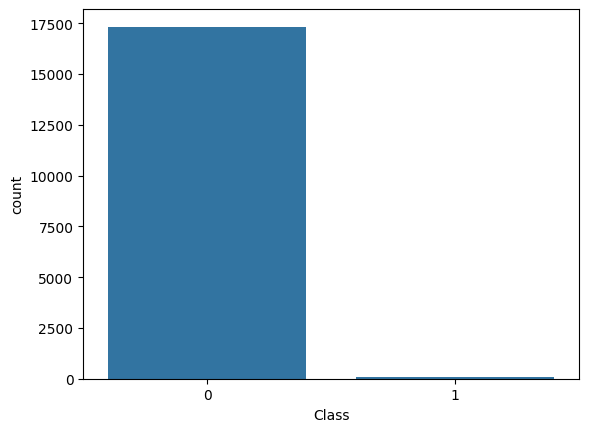

In [9]:
sns.countplot(data = df, x='Class')

<ipython-input-10-f272df1b876a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=class_0, label="Not Fraud Transactions", shade=False)
<ipython-input-10-f272df1b876a>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=class_1, label="Fraud Transactions", shade=False)


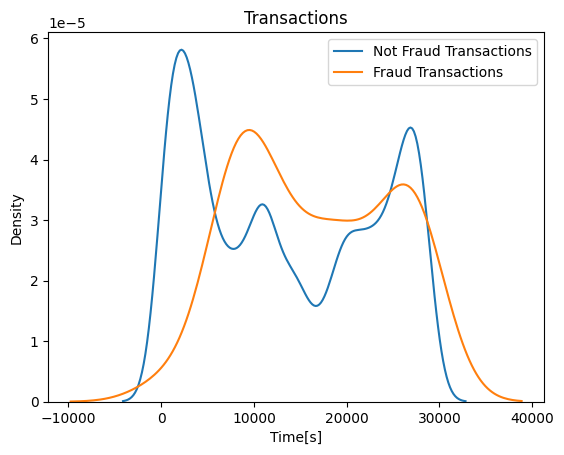

In [10]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

sns.kdeplot(data=class_0, label="Not Fraud Transactions", shade=False)
sns.kdeplot(data=class_1, label="Fraud Transactions", shade=False)
plt.xlabel("Time[s]")
plt.ylabel("Density")
plt.title("Transactions")
plt.legend()
plt.show()

<ipython-input-11-891f7007d275>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8,4,i)
<ipython-input-11-891f7007d275>:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
<ipython-input-11-891f7007d275>:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
<ipython-input-11-891f7007d275>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will b

<Figure size 640x480 with 0 Axes>

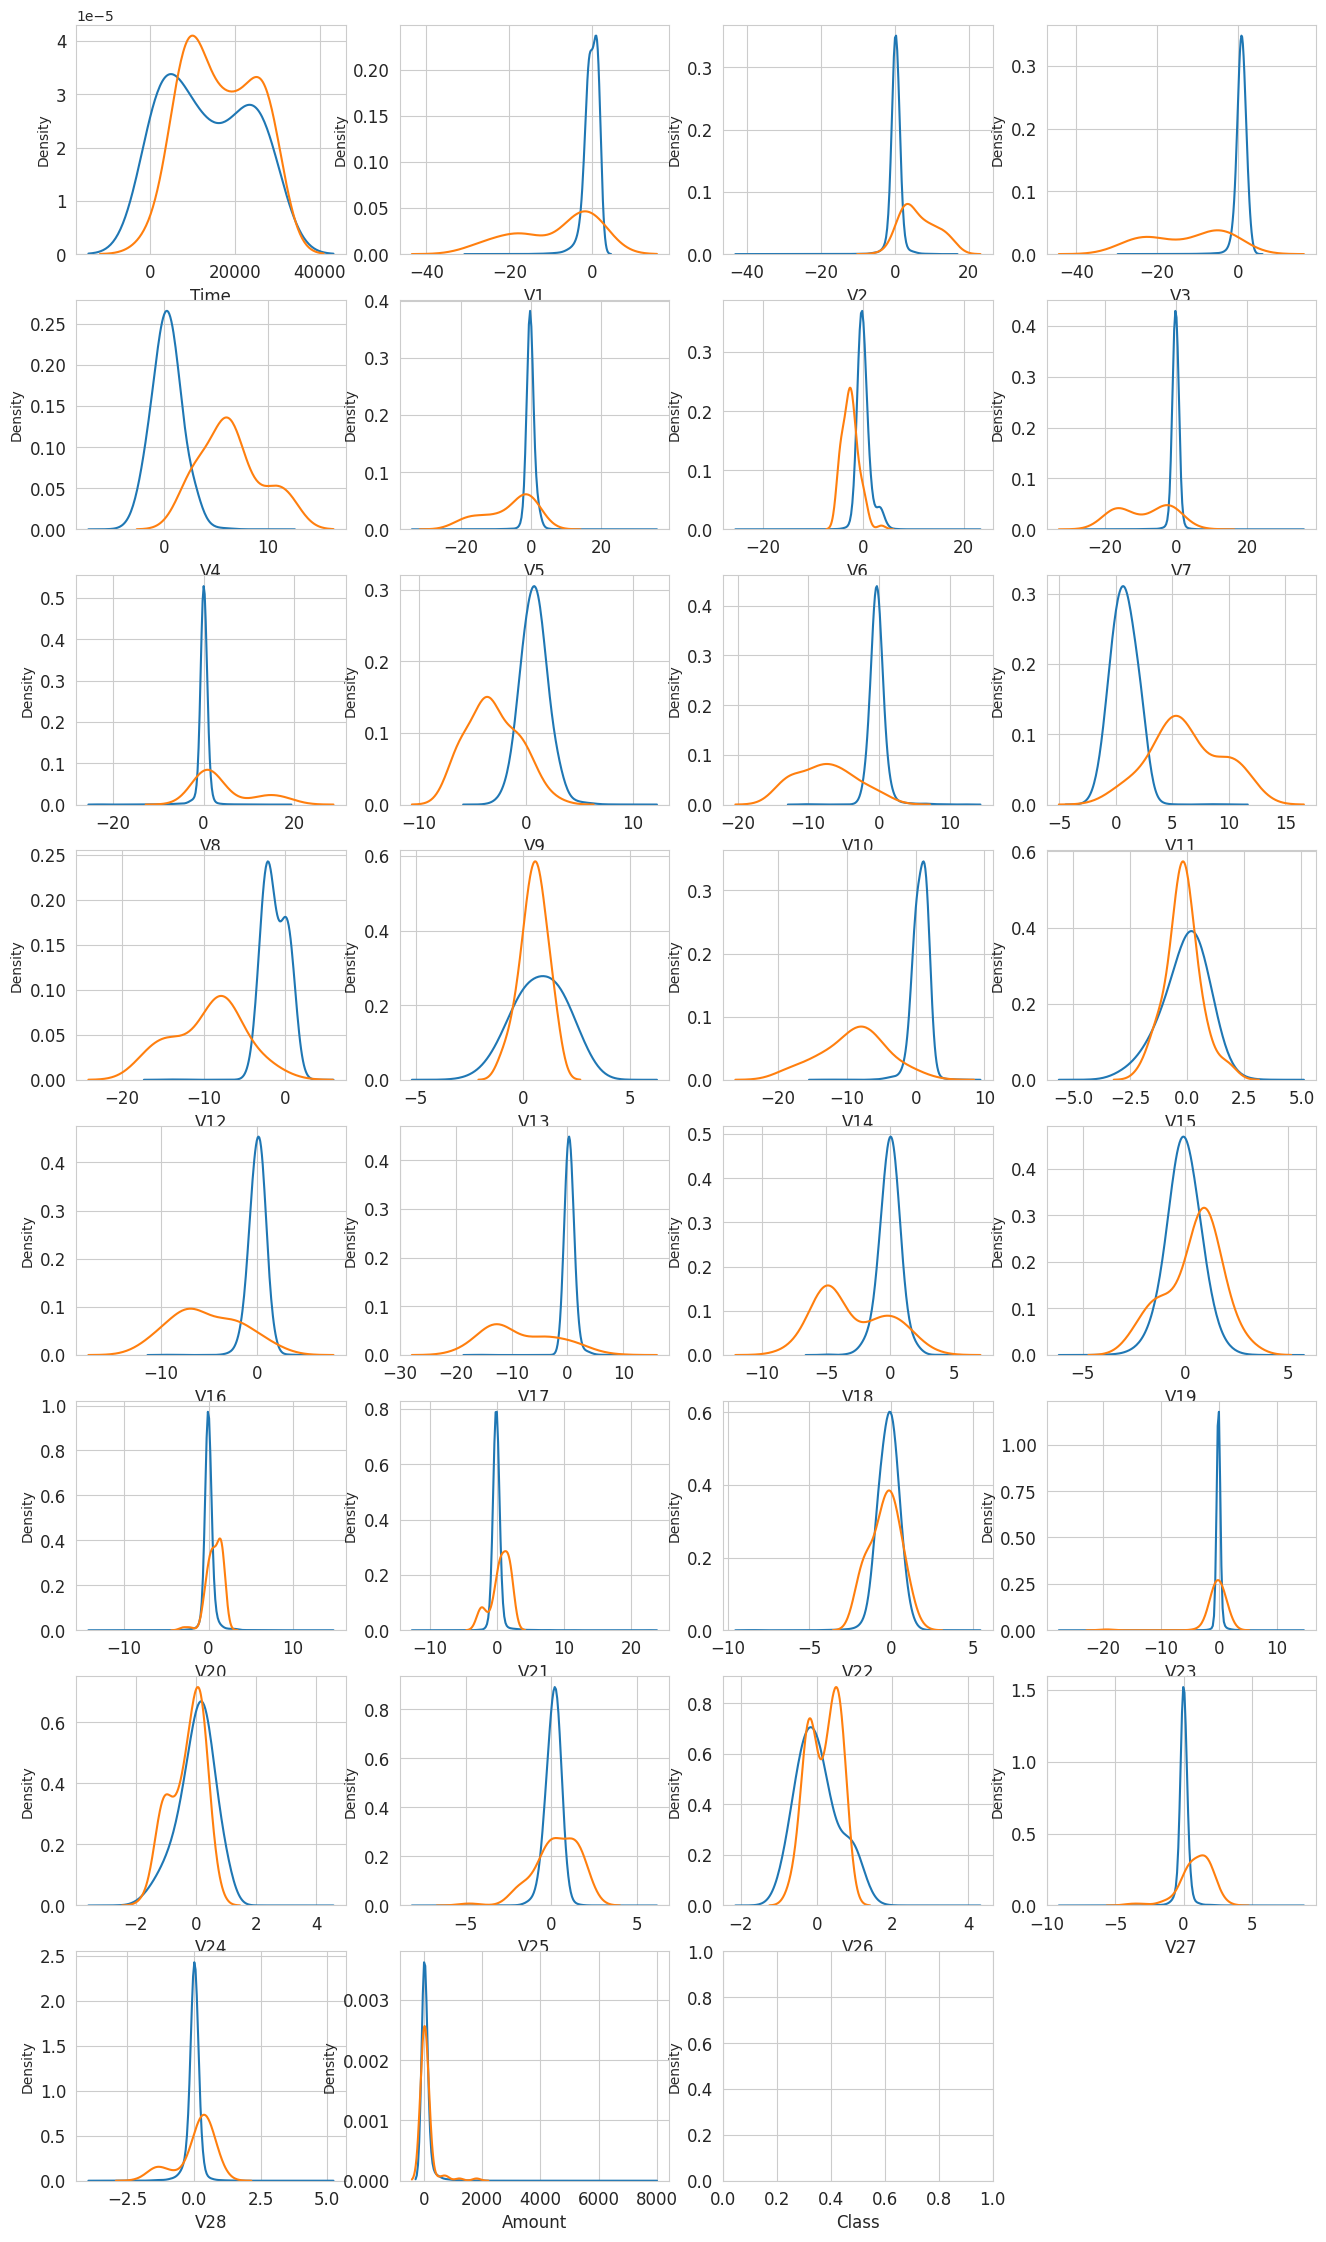

In [11]:
var = df.columns.values
i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,5,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

# Analysis

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

In [13]:
X = df.drop('Class', axis=1)
y = df.Class

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=40),
}

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [16]:
print('Result of different ML Models are:')
print(' ')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print('-x' * 15)
    print(' ')

Result of different ML Models are:
 
Logistic Regression Metrics:
Accuracy: 1.00
Precision: 0.73
Recall: 0.89
F1-score: 0.80
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Metrics:
Accuracy: 1.00
Precision: 0.70
Recall: 0.78
F1-score: 0.74
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
 
Random Forest Metrics:
Accuracy: 1.00
Precision: 0.80
Recall: 0.89
F1-score: 0.84
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
 


Therefore all these models(Logistic Regression, Desicion Tree and Random forest) indentifies the the fraud transaction accurately.